#**PyTorch IV**
Autor: Jheremy Reyes,

estudiante de matemáticas,

Universidad El Bosque

**Listas en PyTorch: Introducción y uso práctico**

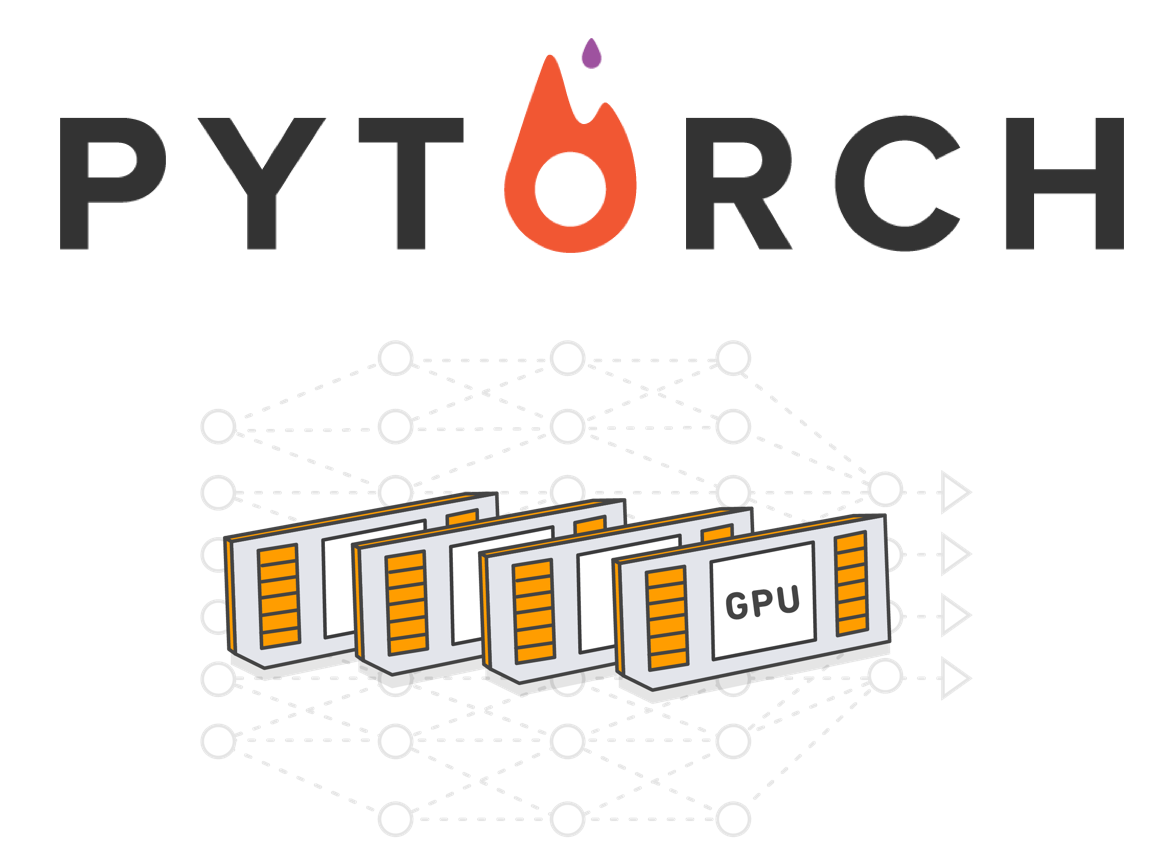

En PyTorch, cuando trabajamos con estructuras de datos, una confusión común —especialmente entre quienes vienen de numpy o programación pura en Python— es cómo manejar colecciones de tensores. Aunque PyTorch no tiene un tipo de dato especial llamado “lista de tensores”, el uso de listas de Python (o tuplas) para agrupar tensores es muy frecuente y fundamental para construir modelos flexibles y dinámicos.

¿Por qué son importantes las listas en PyTorch?

Las listas en PyTorch son esenciales para:

- Agrupar tensores que representan datos o parámetros con forma o tamaño variable.

- Iterar dinámicamente sobre elementos en modelos no secuenciales.

- Construir redes neuronales personalizadas, donde las capas o bloques son definidos mediante estructuras dinámicas.

- Realizar operaciones por lotes (batch) sobre elementos independientes sin necesidad de apilar todo en un solo tensor.

En muchos contextos, usamos listas de tensores para representar estructuras como secuencias de longitudes variables (por ejemplo, en NLP), o resultados intermedios de operaciones.

¿Qué es una lista de tensores?

En términos simples, es una lista de Python (list) cuyos elementos son objetos tipo torch.Tensor. Esto permite almacenar múltiples tensores, ya sean del mismo tamaño o no.

In [ ]:
import torch

# Crear una lista de tensores
lista_de_tensores = [torch.tensor([1, 2]), torch.tensor([3, 4]), torch.tensor([5, 6])]
print(lista_de_tensores)


[tensor([1, 2]), tensor([3, 4]), tensor([5, 6])]


Cada tensor en la lista puede ser accedido e indexado de manera individual:

In [ ]:
print(lista_de_tensores[0])  # tensor([1, 2])
print(lista_de_tensores[1][0])  # 3


tensor([1, 2])
tensor(3)


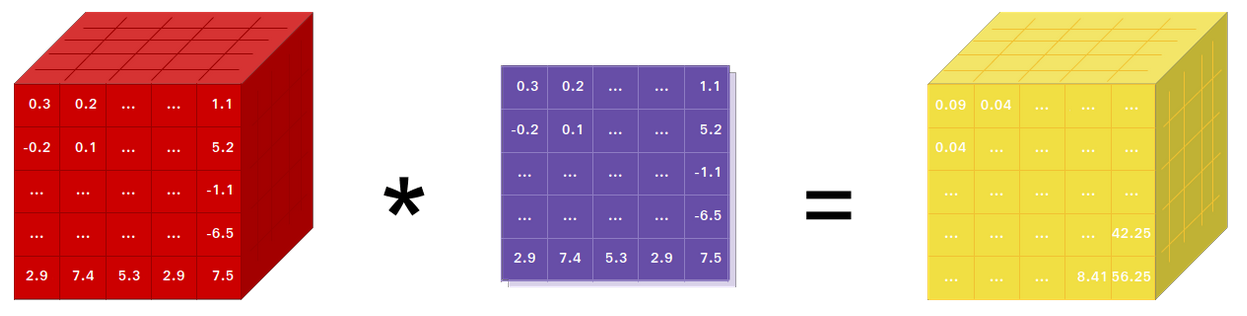

**Ventajas de usar listas en PyTorch**

- Flexibilidad: A diferencia de tensores apilados, no se requiere que los tensores tengan la misma forma o dimensión.

- Compatibilidad con estructuras de control: Se pueden usar en bucles, condicionales y otras estructuras de programación dinámica.

- Facilidad para modelar arquitecturas personalizadas, como árboles, redes recurrentes o flujos de datos no lineales.

**¿Cuándo no usar listas?**

Aunque son útiles, las listas tienen limitaciones:

No están integradas directamente con las operaciones vectorizadas de PyTorch, como lo están los tensores.

No se pueden mover a GPU como un solo objeto. Hay que mover cada tensor individualmente.

No se pueden usar directamente en funciones como loss.backward() o optimizer.step() si se espera una estructura tensorial única.

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Versión de PyTorch instalada
print(torch.__version__)


2.6.0+cu124


In [ ]:
array_examp =np.array(range(70)).reshape(7,10)
lista_examp = array_examp.tolist()
print(array_examp.shape)

(7, 10)


In [ ]:
# Ejemplo de arrays de entrada
array_examp = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
lista_examp = [1, 2, 3, 4, 5]

# Equivalente a tf.data.Dataset.from_tensor_slices(array_examp)
dataset1 = torch.utils.data.TensorDataset(array_examp)

# Equivalente a tf.data.Dataset.from_tensors(array_examp)
dataset2 = [array_examp]  # En PyTorch, `from_tensors` no existe, usamos una lista con el tensor completo

# Equivalente a tf.data.Dataset.from_tensor_slices(lista_examp)
dataset_lista_1 = torch.utils.data.TensorDataset(torch.tensor(lista_examp))

# Equivalente a tf.data.Dataset.from_tensors(lista_examp)
dataset_lista_2 = [torch.tensor(lista_examp)]  # Lista con el tensor completo


In [ ]:
# Datos de ejemplo
array_examp = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
lista_examp = [1, 2, 3, 4, 5]

# Crear datasets en PyTorch
dataset1 = torch.utils.data.TensorDataset(array_examp)
dataset2 = [array_examp]  # from_tensors equivalente
dataset_lista_1 = torch.utils.data.TensorDataset(torch.tensor(lista_examp))
dataset_lista_2 = [torch.tensor(lista_examp)]  # from_tensors equivalente

# Función para imprimir información de los datasets
def print_dataset_info(name, dataset):
    print(f"\n{name}:")
    if isinstance(dataset, torch.utils.data.TensorDataset):
        for i in range(len(dataset)):
            print(f"Elemento {i}: {dataset[i][0].shape}, dtype: {dataset[i][0].dtype}")
    elif isinstance(dataset, list):
        print(f"Elemento único: {dataset[0].shape}, dtype: {dataset[0].dtype}")
    else:
        print("Tipo desconocido:", type(dataset))

# Imprimir información de los datasets
print_dataset_info("Dataset1 (from_tensor_slices)", dataset1)
print_dataset_info("Dataset2 (from_tensors)", dataset2)
print_dataset_info("Dataset Lista 1 (from_tensor_slices)", dataset_lista_1)
print_dataset_info("Dataset Lista 2 (from_tensors)", dataset_lista_2)


Dataset1 (from_tensor_slices):
Elemento 0: torch.Size([3]), dtype: torch.int64
Elemento 1: torch.Size([3]), dtype: torch.int64
Elemento 2: torch.Size([3]), dtype: torch.int64

Dataset2 (from_tensors):
Elemento único: torch.Size([3, 3]), dtype: torch.int64

Dataset Lista 1 (from_tensor_slices):
Elemento 0: torch.Size([]), dtype: torch.int64
Elemento 1: torch.Size([]), dtype: torch.int64
Elemento 2: torch.Size([]), dtype: torch.int64
Elemento 3: torch.Size([]), dtype: torch.int64
Elemento 4: torch.Size([]), dtype: torch.int64

Dataset Lista 2 (from_tensors):
Elemento único: torch.Size([5]), dtype: torch.int64


In [ ]:
# Tensor con forma [10,2,2] lleno de unos
tensor1 = torch.ones((10, 2, 2))

# Tensor con forma [10,1] lleno de unos
tensor2 = torch.ones((10, 1))

# Tensor con forma [9,2,2] lleno de unos
tensor3 = torch.ones((9, 2, 2))

# Verificar formas
print("tensor1 shape:", tensor1.shape)
print("tensor2 shape:", tensor2.shape)
print("tensor3 shape:", tensor3.shape)


tensor1 shape: torch.Size([10, 2, 2])
tensor2 shape: torch.Size([10, 1])
tensor3 shape: torch.Size([9, 2, 2])


In [ ]:
# Crear tensores
tensor1 = torch.ones((10, 2, 2))
tensor2 = torch.ones((10, 1))
tensor3 = torch.ones((9, 2, 2))

# Dataset equivalente a tf.data.Dataset.from_tensors((tensor1, tensor2))
dataset5 = [ (tensor1, tensor2) ]  # from_tensors mantiene el tensor completo

# Dataset equivalente a tf.data.Dataset.from_tensors((tensor1, tensor3))
# Esto generará un error porque tensor1 tiene shape (10,2,2) y tensor3 tiene shape (9,2,2)
# dataset6 = [ (tensor1, tensor3) ]  # Esto dará error

# Imprimir forma de dataset5
print("Dataset5:", dataset5[0][0].shape, dataset5[0][1].shape)


Dataset5: torch.Size([10, 2, 2]) torch.Size([10, 1])


In [ ]:
# Datasets equivalentes a from_tensors en TensorFlow
dataset3 = torch.utils.data.TensorDataset(tensor1)  # Simulación de un dataset simple
dataset5 = [(tensor1, tensor2)]  # from_tensors en TensorFlow almacena la tupla completa en un solo elemento
dataset6 = [(tensor1[:9], tensor3)]  # Ajustamos tensor1 para que tenga el mismo tamaño que tensor3

# Función para imprimir información de los datasets
def print_dataset_info(name, dataset):
    print(f"\n{name}:")
    if isinstance(dataset, torch.utils.data.TensorDataset):
        print(f"Elemento 0: {dataset[0][0].shape}, dtype: {dataset[0][0].dtype}")
    elif isinstance(dataset, list):
        print(f"Elemento único: {[t.shape for t in dataset[0]]}, dtype: {[t.dtype for t in dataset[0]]}")
    else:
        print("Tipo desconocido:", type(dataset))

# Imprimir información de los datasets
print_dataset_info("Dataset3", dataset3)
print_dataset_info("Dataset5", dataset5)
print_dataset_info("Dataset6", dataset6)



Dataset3:
Elemento 0: torch.Size([2, 2]), dtype: torch.float32

Dataset5:
Elemento único: [torch.Size([10, 2, 2]), torch.Size([10, 1])], dtype: [torch.float32, torch.float32]

Dataset6:
Elemento único: [torch.Size([9, 2, 2]), torch.Size([9, 2, 2])], dtype: [torch.float32, torch.float32]


**¿Qué es un Batch en PyTorch?**

En aprendizaje profundo, el concepto de batch (o lote) es fundamental. Cuando entrenamos una red neuronal, no procesamos todo el conjunto de datos de una sola vez, sino que lo dividimos en partes más pequeñas llamadas batches. PyTorch implementa este mecanismo de forma flexible y eficiente, lo cual permite optimizar el rendimiento computacional y facilitar la actualización de los parámetros del modelo.

**¿Por qué se usan batches?**

Existen tres formas comunes de alimentar datos durante el entrenamiento:

Entrenamiento por instancia (Stochastic Gradient Descent – SGD): se procesa una sola muestra a la vez.

Entrenamiento por lotes (Batch Gradient Descent): se procesan todas las muestras a la vez.

Entrenamiento en mini-batches (Mini-Batch Gradient Descent): se divide el conjunto de datos en pequeños grupos (mini-batches) y se entrena con cada uno secuencialmente.

PyTorch utiliza principalmente el enfoque de mini-batches, que ofrece una excelente relación entre eficiencia computacional y estabilidad en el entrenamiento.

**¿Cómo se representa un batch en PyTorch?**

Un batch de datos es simplemente un tensor con una dimensión adicional que representa cuántos ejemplos se están procesando al mismo tiempo.

Por ejemplo, si estamos trabajando con imágenes en escala de grises de 28×28 píxeles:

- Una sola imagen se representa como un tensor de forma (1, 28, 28) (1 canal, altura 28, ancho 28).

- Un batch de 64 imágenes se representa como un tensor de forma (64, 1, 28, 28).

De manera general, para cualquier tipo de datos, la primera dimensión del tensor representa el tamaño del batch:

In [ ]:
import torch

# Supongamos que tenemos un batch de 4 vectores de 3 elementos cada uno
batch = torch.tensor([
    [1.0, 2.0, 3.0],   # muestra 1
    [4.0, 5.0, 6.0],   # muestra 2
    [7.0, 8.0, 9.0],   # muestra 3
    [10.0, 11.0, 12.0] # muestra 4
])

print("Forma del batch:", batch.shape)  # torch.Size([4, 3])


Forma del batch: torch.Size([4, 3])


Aquí, cada fila representa una muestra, y hay 4 muestras en el batch. Este tipo de estructura es la que espera PyTorch cuando alimentamos los datos al modelo

**Integración con DataLoader**

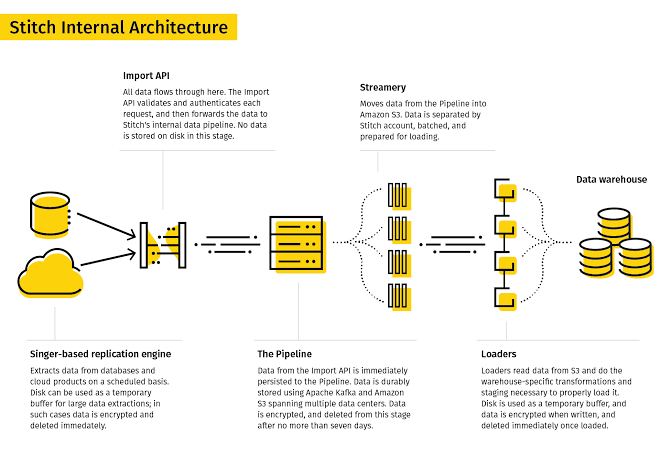

PyTorch facilita la creación y manejo de batches a través de la clase DataLoader, que automatiza el agrupamiento y la iteración sobre los datos:

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Crear un conjunto de datos ficticio
X = torch.randn(100, 10)  # 100 muestras, 10 características
y = torch.randint(0, 2, (100,))  # 100 etiquetas binarias

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Iterar sobre los datos en batches
for xb, yb in loader:
    print("Batch de entrada:", xb.shape)
    print("Batch de etiquetas:", yb.shape)
    break


Batch de entrada: torch.Size([16, 10])
Batch de etiquetas: torch.Size([16])


In [ ]:
# Crear dataset con valores de 0 a 19 (equivalente a tf.data.Dataset.range(20))
dataset_range = torch.arange(20)

# Convertirlo en un TensorDataset
dataset_range = TensorDataset(dataset_range)

# Agrupar en batches de tamaño 3 (equivalente a dataset_range.batch(3))
dataloader = DataLoader(dataset_range, batch_size=3)

# Enumerar los batches desde 0 (equivalente a dataset_range.enumerate(start=0))
for idx, batch in enumerate(dataloader, start=0):
    print(idx, batch[0].numpy())  # Convertir a NumPy para visualizar

0 [0 1 2]
1 [3 4 5]
2 [6 7 8]
3 [ 9 10 11]
4 [12 13 14]
5 [15 16 17]
6 [18 19]


In [ ]:
# Crear dataset con valores de 0 a 19 (equivalente a tf.data.Dataset.range(20))
dataset_range = torch.arange(20)

# Convertirlo en un TensorDataset
dataset_range = TensorDataset(dataset_range)

# Agrupar en batches de tamaño 3 y descartar el último lote si no tiene el tamaño completo
dataloader = DataLoader(dataset_range, batch_size=3, drop_last=True)

# Enumerar los batches desde 0 (equivalente a dataset_range.enumerate(start=0))
for idx, batch in enumerate(dataloader, start=0):
    print(idx, batch[0].numpy())  # Convertir a NumPy para visualizar


0 [0 1 2]
1 [3 4 5]
2 [6 7 8]
3 [ 9 10 11]
4 [12 13 14]
5 [15 16 17]


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import itertools

# Crear dataset con valores de 0 a 19
dataset_range = torch.arange(20)

# Convertirlo en un TensorDataset
dataset_range = TensorDataset(dataset_range)

# Agrupar en batches de tamaño 3 y descartar el último lote si es incompleto
dataloader = DataLoader(dataset_range, batch_size=3, drop_last=True)

# Tomar solo los 2 primeros batches
for idx, batch in itertools.islice(enumerate(dataloader), 2):
    print(batch[0].numpy())


[0 1 2]
[3 4 5]


In [ ]:
# Simulación de dataset1 (debes reemplazarlo con tus datos reales)
dataset1 = torch.arange(12)  # Suponiendo 12 elementos para ver varios lotes

# Convertirlo en un TensorDataset
dataset1 = TensorDataset(dataset1)

# Crear DataLoader con batch_size=3
dataloader = DataLoader(dataset1, batch_size=3)

# Enumerar desde 0
for idx, batch in enumerate(dataloader, start=0):
    print(idx, batch[0].numpy())  # Convertir a NumPy para visualizar


0 [0 1 2]
1 [3 4 5]
2 [6 7 8]
3 [ 9 10 11]


In [ ]:
# Simulación de dataset1 (reemplázalo con tus datos reales)
dataset1 = torch.arange(10)  # Suponiendo 10 elementos para la demostración

# Convertir a TensorDataset
dataset1 = TensorDataset(dataset1)

# Crear DataLoader con batch_size=1
dataloader = DataLoader(dataset1, batch_size=1)

# Enumerar desde 0 (equivalente a .enumerate(start=0) en TF)
for idx, batch in enumerate(dataloader, start=0):
    print(idx, batch[0].numpy())  # Convertir a NumPy para visualizar


0 [0]
1 [1]
2 [2]
3 [3]
4 [4]
5 [5]
6 [6]
7 [7]
8 [8]
9 [9]


**Función flat_map en PyTorch (y en programación funcional)**

**¿Qué es flat_map?**

Aunque PyTorch no tiene una función flat_map incorporada como tal en su API, este concepto proviene de la programación funcional, y es útil entenderlo, ya que aparece en librerías como PySpark, Kotlin, Scala, Haskell, y en paradigmas funcionales en general.

In [ ]:
# Usando map seguido de flatten (sin flat_map)
data = ["a,b,c", "d,e"]
mapped = map(lambda x: x.split(","), data)  # [['a','b','c'], ['d','e']]
flattened = [item for sublist in mapped for item in sublist]
print(flattened)  # ['a', 'b', 'c', 'd', 'e']


['a', 'b', 'c', 'd', 'e']


In [ ]:
def flat_map(func, iterable):
    return [item for sublist in map(func, iterable) for item in sublist]

# Ejemplo
data = ["1,2", "3,4"]
result = flat_map(lambda x: x.split(","), data)
print(result)  # ['1', '2', '3', '4']


['1', '2', '3', '4']


**¿Cuándo se usa flat_map en ciencia de datos o PyTorch?**


Aunque no es común en el core de PyTorch, el concepto de flat_map es útil para:

- Preprocesar datasets donde una muestra se puede convertir en varias submuestras.

- Procesar secuencias anidadas y convertirlas en una sola secuencia.

- Transformar datos con operaciones de tokenización, ventaneo (sliding windows), o expansión temporal.

In [ ]:
data = ["1,2,3", "4,5", "6"]


In [ ]:
flat_tensor = torch.tensor(
    flat_map(lambda x: list(map(int, x.split(","))), data)
)
print(flat_tensor)  # tensor([1, 2, 3, 4, 5, 6])


tensor([1, 2, 3, 4, 5, 6])


Aunque no sea parte directa de la API de PyTorch, entender y aplicar el patrón flat_map es muy útil para tareas complejas de preprocesamiento de datos, especialmente cuando se combinan estructuras irregulares o anidadas.